#CAO TRẦN HOÀNG VŨ - 2274802011015 - LAP 7: ANN

In [3]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

In [4]:
# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

In [5]:
# Chia dữ liệu 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)    # Thêm chiều cho nhãn

In [6]:
# Xây dựng mô hình ANN cơ bản
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()       # Xóa gradient cũ
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()             # Tìm cách sửa
    optimizer.step()            # Sửa trọng số
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")

Epoch [20/100], loss: 0.6049
Epoch [40/100], loss: 0.5641
Epoch [60/100], loss: 0.4728
Epoch [80/100], loss: 0.3899
Epoch [100/100], loss: 0.3316


In [7]:
# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    print(f"Độ chính xác: {accuracy*100:.2f}%")

Độ chính xác: 83.33%


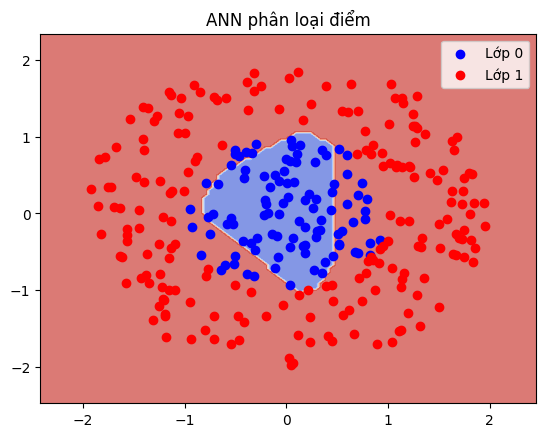

In [8]:
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

## Kết luận
Lab này cho thấy ANN có thể phân loại điểm không tách biệt tuyến tính (vòng tròn và vành đai). Kết quả thay đổi mỗi lần chạy vì dữ liệu ngẫu nhiên - giống như mỗi lần thi điểm khác nhau! Các bạn có thể thử thay đổi số nút hoặc số lần học để xem điều gì xảy ra.

Bài lab này cho thấy mạng nơ-ron nhân tạo (ANN) có khả năng phân loại dữ liệu không tuyến tính, cụ thể là tách biệt hai nhóm điểm thuộc vòng tròn và vành đai. Điều này chứng minh rằng ANN có thể học được ranh giới quyết định phức tạp thay vì chỉ xử lý các bài toán phân loại tuyến tính.

Tuy nhiên, do dữ liệu được tạo ra ngẫu nhiên nên kết quả có thể thay đổi sau mỗi lần chạy. Có thể điều chỉnh số lượng neuron hoặc số lần huấn luyện để quan sát ảnh hưởng của chúng đến độ chính xác của mô hình.

#Phần 1: Thay đổi cấu trúc ANN

Yêu cầu

1. Tăng số nút trong lớp ẩn:

- Sửa lớp ẩn 1 từ 4 nút thành 8 nút trong code định nghĩa ANN.
- Huấn luyện lại mô hình với cùng dữ liệu X_train, y_train từ lab (100 epochs).
- Ghi lại giá trị mất mát cuối cùng (loss) và độ chính xác trên tập kiểm tra (X_test, y_test).
Thêm một lớp ẩn:

2. Thêm một lớp ẩn
Thêm một lớp ẩn thứ 2 với 6 nút, dùng reLu làm hàm kích hoạt. Cấu trúc mới:
    - Đầu vào: 2 nút.
    - Lớp ẩn 1: 8 nút (ReLU).
    - Lớp ẩn 2: 6 nút (ReLU).
    - Đầu ra: 1 nút (Sigmoid).
  - Huấn luyện lại mô hình (100 epochs).
  - Ghi lại giá trị mất mát cuối cùng và độ chính xác.
3. Câu hỏi

- So sánh kết quả của cả 3 mô hình (4 nút, 8 nút, 8+6 nút):
  - Mất mát cuối cùng thay đổi thế nào?
  - Độ chính xác có cải thiện không? Tại sao bạn nghĩ vậy?
- Viết câu trả lời trong Markdown.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Đã sửa từ fcl -> fc1
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Đã sửa từ fcl -> fc1
        x = self.sigmoid(self.fc2(x))
        return x

model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()  # Đã sửa từ mo_grad() -> zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        pred = model(X_test)
        loss = criterion(pred, y_test)
        pred = (pred > 0.5).float()
        accuracy = (pred == y_test).float().mean()
        print(f'Mất mát cuối cùng: {loss.item()}')  # Đã sửa chuỗi in
        print(f'Độ chính xác: {accuracy.item()}')  # Đã sửa chuỗi in

Mất mát cuối cùng: 0.6524734497070312
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6495519280433655
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6470121145248413
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6447742581367493
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.642801821231842
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6410202383995056
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6394214034080505
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6380512118339539
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.636901319026947
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6359779238700867
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6352456212043762
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6347123980522156
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6343074440956116
Độ chính xác: 0.6333333253860474
Mất mát cuối cùng: 0.6340218782424927
Độ chính xác: 0.6333333253860474
Mất mát 

In [12]:
class ANN_SGD(nn.Module):
    def __init__(self):
        super(ANN_SGD, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model_sgd = ANN_SGD()
criterion = nn.BCELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

for epoch in range(100):
    model_sgd.train()
    optimizer_sgd.zero_grad()
    outputs = model_sgd(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer_sgd.step()

model_sgd.eval()
with torch.no_grad():
    pred = model_sgd(X_test)
    loss_sgd = criterion(pred, y_test)
    pred = (pred >= 0.5).float()
    accuracy_sgd = (pred == y_test).float().mean()
    print(f"Độ mất mát cuối cùng (SGD): {loss_sgd.item()}")
    print(f"Độ chính xác (SGD): {accuracy_sgd.item()}")

Độ mất mát cuối cùng (SGD): 0.6647148728370667
Độ chính xác (SGD): 0.5833333134651184


## Phần 2: Thử nghiệm với hàm mất mát và tối ưu hóa
### Yêu cầu
1. **Dùng BCEWithLogitsLoss thay cho BCELoss**:  
   - Thay `nn.BCELoss()` bằng `nn.BCEWithLogitsLoss()`.  
   - Xóa hàm Sigmoid khỏi lớp đầu ra của mô hình (vì `BCEWithLogitsLoss` tự xử lý).  
   - Huấn luyện lại mô hình với cấu trúc ban đầu (2-4-1, 100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

2. **Thay Adam bằng SGD**:  
   - Dùng lại cấu trúc ban đầu (2-4-1) với `nn.BCELoss()`.  
   - Thay `optim.Adam` bằng `optim.SGD` với `lr=0.01`.  
   - Huấn luyện lại (100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả:  
     - `BCEWithLogitsLoss` có khác gì so với `BCELoss` về mất mát và độ chính xác? Tại sao?  
     - `SGD` so với `Adam`: Mất mát giảm nhanh hơn hay chậm hơn? Độ chính xác thay đổi ra sao?  
   - Viết câu trả lời trong ô Markdown.

---

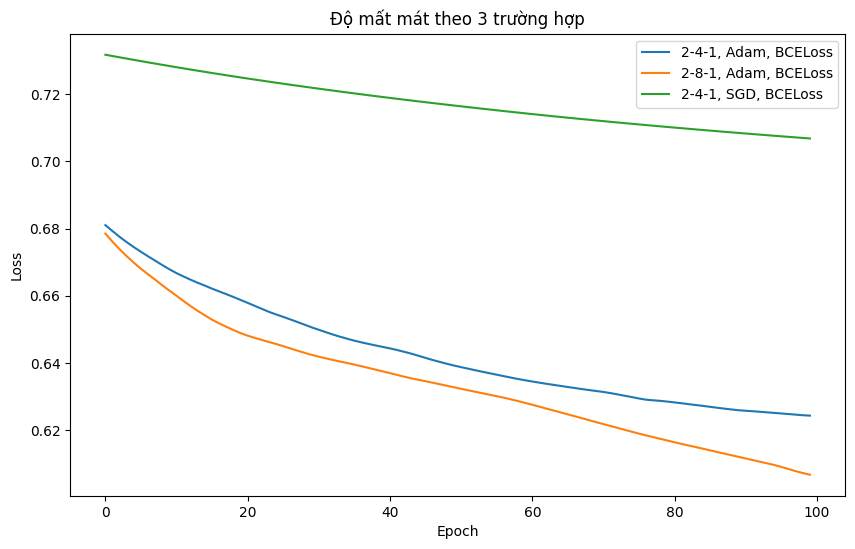

In [13]:
X_train = torch.randn(100, 2)
y_train = torch.randint(0, 2, (100, 1)).float()
X_test = torch.randn(20, 2)
y_test = torch.randint(0, 2, (20, 1)).float()

class ANN(nn.Module):
    def __init__(self, hidden_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

def train_model(model, criterion, optimizer, X_train, y_train, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    return loss_history

model_4_adam = ANN(hidden_size=4)
criterion = nn.BCELoss()
optimizer_adam = optim.Adam(model_4_adam.parameters(), lr=0.01)
loss_history_4_adam = train_model(model_4_adam, criterion, optimizer_adam, X_train, y_train)

model_8_adam = ANN(hidden_size=8)
optimizer_adam_8 = optim.Adam(model_8_adam.parameters(), lr=0.01)
loss_history_8_adam = train_model(model_8_adam, criterion, optimizer_adam_8, X_train, y_train)

model_4_sgd = ANN(hidden_size=4)
optimizer_sgd = optim.SGD(model_4_sgd.parameters(), lr=0.01)
loss_history_4_sgd = train_model(model_4_sgd, criterion, optimizer_sgd, X_train, y_train)

plt.figure(figsize=(10, 6))
plt.plot(loss_history_4_adam, label='2-4-1, Adam, BCELoss')
plt.plot(loss_history_8_adam, label='2-8-1, Adam, BCELoss')
plt.plot(loss_history_4_sgd, label='2-4-1, SGD, BCELoss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Độ mất mát theo 3 trường hợp')
plt.legend()
plt.show()

Epoch [20/100], Loss: 0.6783
Epoch [40/100], Loss: 0.6612
Epoch [60/100], Loss: 0.6558
Epoch [80/100], Loss: 0.6493
Epoch [100/100], Loss: 0.6416
Độ chính xác: 35.00%


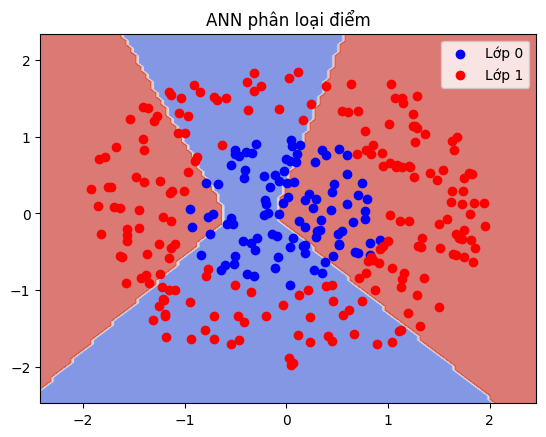

In [14]:
# Xây dựng mô hình ANN cơ bản
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, đầu ra 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Đầu ra 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()              # Xóa gradient cũ
    outputs = model(X_train)           # Dự đoán
    loss = criterion(outputs, y_train) # Tính sai số
    loss.backward()                    # Tìm cách sửa
    optimizer.step()                   # Sửa trong số
    if (epoch + 1) % 20 == 0:          # Mỗi 20 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred == y_test).float().sum() / y_test.size(0)
    print(f"Độ chính xác: {accuracy*100:.2f}%")

# Tạo lưới để vẽ ranh giới
X_min, X_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid >= 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

Epoch [20/100], Loss: 0.6667
Epoch [40/100], Loss: 0.6475
Epoch [60/100], Loss: 0.6325
Epoch [80/100], Loss: 0.6268
Epoch [100/100], Loss: 0.6224
Độ chính xác: 30.00%


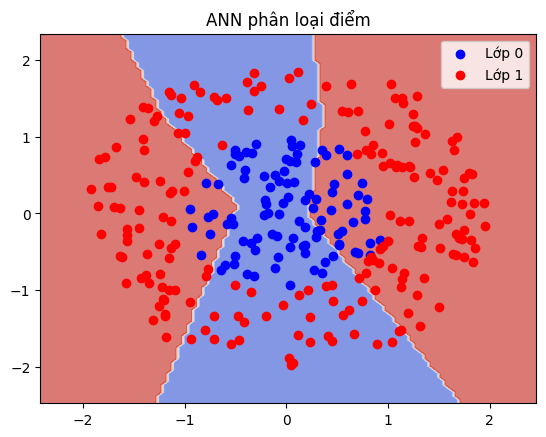

In [15]:
# Xây dựng mô hình ANN cơ bản
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Đầu vào 2, đầu ra 8
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(8, 1)  # Đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Đầu ra 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()              # Xóa gradient cũ
    outputs = model(X_train)           # Dự đoán
    loss = criterion(outputs, y_train) # Tính sai số
    loss.backward()                    # Tìm cách sửa
    optimizer.step()                   # Sửa trong số
    if (epoch + 1) % 20 == 0:          # Mỗi 20 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred == y_test).float().sum() / y_test.size(0)
    print(f"Độ chính xác: {accuracy*100:.2f}%")

# Tạo lưới để vẽ ranh giới
X_min, X_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid >= 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

Epoch [20/100], Loss: 0.7123
Epoch [40/100], Loss: 0.7121
Epoch [60/100], Loss: 0.7120
Epoch [80/100], Loss: 0.7119
Epoch [100/100], Loss: 0.7117
Độ chính xác: 50.00%


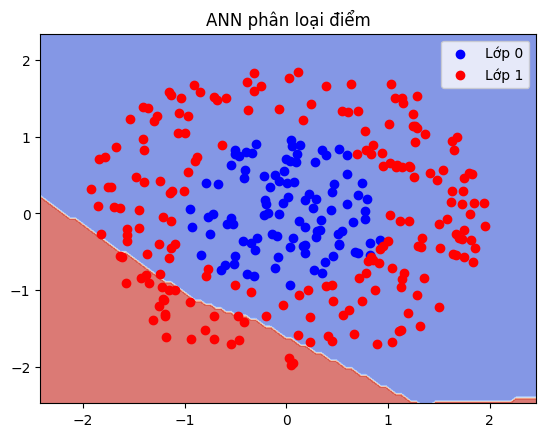

In [16]:
# Xây dựng mô hình ANN cơ bản
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, đầu ra 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Đầu ra 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()              # Xóa gradient cũ
    outputs = model(X_train)           # Dự đoán
    loss = criterion(outputs, y_train) # Tính sai số
    loss.backward()                    # Tìm cách sửa
    optimizer.step()                   # Sửa trong số
    if (epoch + 1) % 20 == 0:          # Mỗi 20 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Kiểm tra
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()  # Chuyển thành 0 hoặc 1
    accuracy = (y_pred == y_test).float().sum() / y_test.size(0)
    print(f"Độ chính xác: {accuracy*100:.2f}%")

# Tạo lưới để vẽ ranh giới
X_min, X_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid >= 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()